# Heart Disease Risk Prediction

In [ ]:
%pip install numpy matplotlib pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
missing_values = df.isnull()
print(missing_values)

       Age    Sex  Chest pain type     BP  Cholesterol  FBS over 120  \
0    False  False            False  False        False         False   
1    False  False            False  False        False         False   
2    False  False            False  False        False         False   
3    False  False            False  False        False         False   
4    False  False            False  False        False         False   
..     ...    ...              ...    ...          ...           ...   
265  False  False            False  False        False         False   
266  False  False            False  False        False         False   
267  False  False            False  False        False         False   
268  False  False            False  False        False         False   
269  False  False            False  False        False         False   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0          False   False            False          False      

In [5]:
df_cleaned = df.dropna()
print(df_cleaned)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [6]:
print(df_cleaned.describe())

              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

In [7]:
df_cleaned['Heart_Disease'] = df_cleaned['Heart Disease'].map({'Presence': 1, 'Absence': 0})
df_cleaned.drop(['Heart Disease'], axis=1, inplace=True)

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Chest pain type'}>,
        <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FBS over 120'}>,
        <Axes: title={'center': 'EKG results'}>,
        <Axes: title={'center': 'Max HR'}>],
       [<Axes: title={'center': 'Exercise angina'}>,
        <Axes: title={'center': 'ST depression'}>,
        <Axes: title={'center': 'Slope of ST'}>,
        <Axes: title={'center': 'Number of vessels fluro'}>],
       [<Axes: title={'center': 'Thallium'}>,
        <Axes: title={'center': 'Heart_Disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

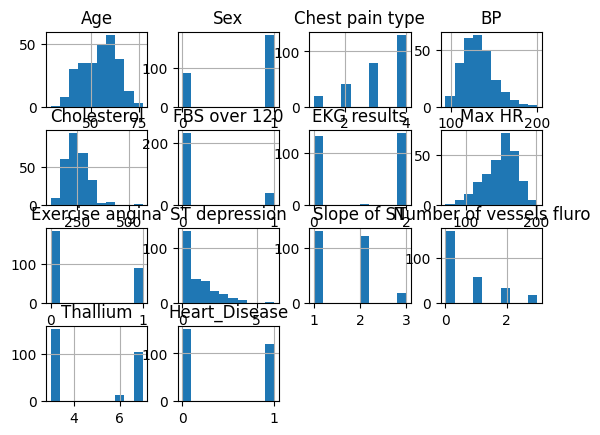

In [8]:
df_cleaned.hist()

In [10]:
print(df_cleaned.shape)

(270, 14)


In [12]:
df_cleaned.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease,is_train
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1,True
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0,True
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1,False
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0,True
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0,False


In [13]:
p_train = 0.70 # Porcentaje de train.

df_cleaned['is_train'] = np.random.uniform(0, 1, len(df_cleaned)) <= p_train
train, test = df_cleaned[df_cleaned['is_train']==True], df_cleaned[df_cleaned['is_train']==False]


In [18]:
df_cleaned.drop(['is_train'], axis=1, inplace=True)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  188
Ejemplos usados para test:  82
